Zadanie 4

In [60]:
import matplotlib.pyplot as plt
import numpy as np


In [61]:
#float32 single precision
#float64 double precision


def f(x0, r, n, singlePrecision):
    

    for i in range(n):
        if singlePrecision:
            tmp = np.float32(r*x0*(1-x0))
        else:
            tmp = np.float64(r*x0*(1-x0))
        x0 = tmp
    return x0


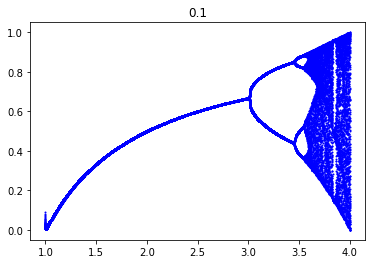

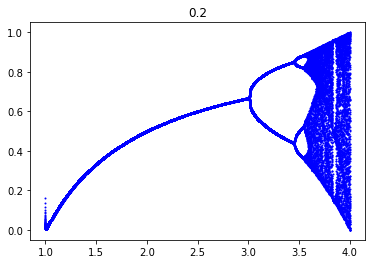

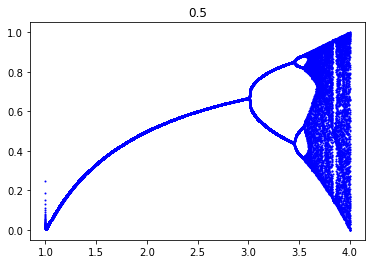

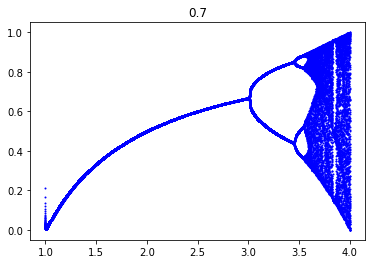

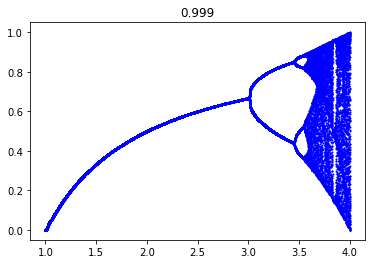

In [70]:
def A(x0):
    r = 1.0
    r_step = x_step = 5e-3
    iter = 10**2
    xAxis = []
    yAxis = []
    plt.title(str(x0))

    while (r<4.0):
        res = f(x0,r,iter,False)

        for i in range(iter):
            tmp = r*x0*(1-x0)
            x0 = tmp
            xAxis.append(x0)
            yAxis.append(r)
        r+= r_step

    plt.plot( yAxis,xAxis,'bo', markersize=1)
    plt.show()

A(0.1)
A(0.2)
A(0.5)
A(0.7)
A(0.999)




W zależności od x diagramy bifurkacyjne są znacząco podobne. Jedyną różnicą jest rozproszenie początkowych wartości dla r bliskiego 1, co wynika bezpośrednio z charakterystyki równania, w szczególności składnika (1-x)

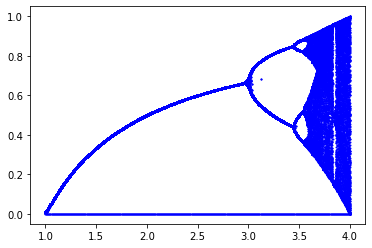

In [62]:
def A2(flag):

    iter = 10**2
    r = 1.0
    r_step = x_step = 5e-3

    xAxis = []
    yAxis = []

    while (r<4.0):
        x0 = 0.0

        while(x0<1.0):
            res = f(x0,r,iter, flag)

            xAxis.append(res)
            yAxis.append(r)
            x0 += x_step
        r += r_step


    plt.plot( yAxis,xAxis,'bo', markersize=1)
    plt.show()

A(False)

Diagram bifurkacyjny dla 0 < x < 1 oraz 1 < r < 4

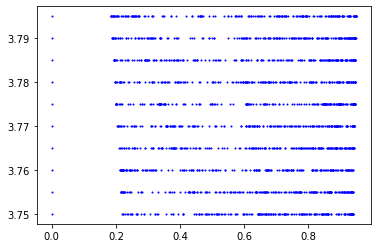

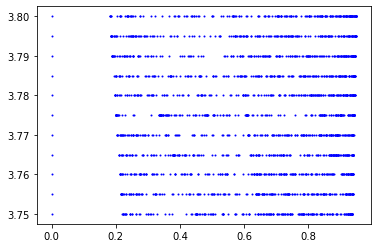

In [74]:

def B(flag):

    iter = 10**2
    xAxis = []
    yAxis = []

    if flag:
        #single precision
        r=np.float32(3.75)
        end = np.float32(3.8)
        r_step = x_step = np.float32(5e-3)
        x0end = np.float32(1.0)

    else:
        #double precision
        r = np.float64(3.75)
        end = np.float64(3.8)
        r_step = x_step = np.float64(5e-3)
        x0end = np.float64(1.0)



    while (r<end):
        if flag:
            x0 =np.float32(0.0) 
        else: 
            x0 = np.float64(0.0)


        while(x0<x0end):
            res = f(x0,r,iter, flag)

            xAxis.append(res)
            yAxis.append(r)
            x0 += x_step
        r += r_step

    plt.plot( xAxis,yAxis,'bo', markersize=1)
    plt.show()

B(True)
B(False)


Na pierwszy rzut oka wyniki są zbliżone, jednak po dokładnej analizie zauważamy, że wartości funkcji w przypadku pojedynczej precyzji wyniki są bardziej zagęszczone. Dla liczb podwójnej precyzji wartości są dokładniejsze, dlatego największe różnice występują w końcowych iteracjach, kiedy część informacji zostaje utracona.

x0=  1.0 iteration count=  1
x0=  0.98 iteration count=  2645
x0=  0.96000004 iteration count=  1926
x0=  0.94000006 iteration count=  2347
x0=  0.9200001 iteration count=  2218
x0=  0.9000001 iteration count=  3371
x0=  0.8800001 iteration count=  750
x0=  0.86000013 iteration count=  1247
x0=  0.84000015 iteration count=  3087
x0=  0.8200002 iteration count=  574
x0=  0.7800002 iteration count=  442
x0=  0.7600002 iteration count=  3834
x0=  0.74000025 iteration count=  946
x0=  0.72000027 iteration count=  1021
x0=  0.7000003 iteration count=  1966
x0=  0.6600003 iteration count=  2269
x0=  0.64000034 iteration count=  3370
x0=  0.62000036 iteration count=  367
x0=  0.6000004 iteration count=  3667
x0=  0.5600004 iteration count=  997
x0=  0.54000044 iteration count=  2105
x0=  0.5000005 iteration count=  2
x0=  0.48000047 iteration count=  3264
x0=  0.46000046 iteration count=  918
x0=  0.44000044 iteration count=  2593
x0=  0.40000042 iteration count=  2425
x0=  0.3800004 iteratio

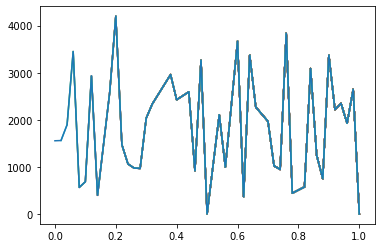

In [73]:
def C():
    r =np.float32(4)
    x0 = np.float32(1)
    x_step = np.float32(2e-2)
    epsilion = np.float32(1e-15)
    
    maxNoIterations = 20e4

    xAxis = []
    yAxis = [] 


    i = 0
    while x0>0 and i <= 100:
        
        cnt = 0
        cpx0 = x0
        while(x0>epsilion and cnt < maxNoIterations):
            tmp = np.float32(r*x0*(1-x0))
            x0 = tmp
            cnt += 1
        if (cnt < maxNoIterations):
            xAxis.append(cpx0)
            yAxis.append(cnt)

            print("x0= ", cpx0, "iteration count= ", cnt )

        x0 = cpx0 - x_step

        plt.plot(xAxis, yAxis)

        i += 1
C()


Liczba iteracji potrzebnych do osiągniecia 0 z dokładnością do 10^(-15). 
Wynik znacznie się różni dla zbliżonych wartości x.